# Лабораторная работа № 7
## Эллиптические уравнения в частных производных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, pi, exp

In [2]:
%matplotlib inline
import matplotlib_inline

In [3]:
def solve(preset, solver_type, nx, ny, eps, relax=1):
    iter_count, x, y, u, error = !solver {preset} {solver_type} {nx} {ny} {eps} {relax}
    iter_count = int(iter_count)
    x = np.array(x.rstrip().split(), dtype=np.float64)
    y = np.array(y.rstrip().split(), dtype=np.float64)
    y, x = np.meshgrid(y, x)
    u = np.array(u.rstrip().split(), dtype=np.float64).reshape(nx+1, ny+1)
    error = np.array(error.rstrip().split(), dtype=np.float64).reshape(nx+1, ny+1)
    return iter_count, x, y, u, error

In [4]:
def plot_solution(method, iter_count, x, y, u, error, azim=None, interactive=False):
    if interactive:
        %matplotlib widget
        plt.rcParams['figure.dpi'] = 100
        fig = plt.figure(figsize=(10, 5))
        fig.canvas.header_visible = False
    else:
        %matplotlib inline
        matplotlib_inline.backend_inline.set_matplotlib_formats('retina', 'pdf')
        plt.rcParams['figure.dpi'] = 100
        fig = plt.figure(figsize=(12, 6))
        
    fig.supxlabel(f'{method.capitalize()} method. {iter_count} iterations', y=0.93, size=13)

    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(x, y, u, cmap='Spectral')
    ax.set(title='Solution', xlabel='x', ylabel='y')
    ax.view_init(azim=azim)

    ax = fig.add_subplot(122, projection='3d')
    ax.plot_surface(x, y, error, cmap='Spectral')
    ax.set(title='Error', xlabel='x', ylabel='y')
    ax.view_init(azim=azim)
    plt.show()

In [5]:
def plot_analitical_solution(u, x0, x1, y0, y1, azim=None, samples=100):
    %matplotlib inline
    matplotlib_inline.backend_inline.set_matplotlib_formats('retina', 'pdf')
    plt.rcParams['figure.dpi'] = 100
    
    x = np.linspace(x0, x1, samples)
    y = np.linspace(y0, y1, samples)
    x, y = np.meshgrid(x, y)
    z = u(*np.c_[x.ravel(), y.ravel()].T).reshape(x.shape)
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='Spectral')
    ax.set(xlabel='x', ylabel='y')
    ax.view_init(azim=azim)
    plt.show()

In [6]:
Nx = Ny = 50
EPS = 1e-5
RELAX = 1.8

In [7]:
!make clean && make

rm solver
g++ -std=c++17 -Wall -Wextra -pedantic solver.cpp -o solver


## Вариант 8

\begin{align*} 
& \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = -2 \frac{\partial u}{\partial x} - 3u \\
& u(0, y)=\cos y \\
& u(\frac{\pi}{2}, y) = 0 \\
& u(x, 0) = \exp(-x)\cos x \\
& u(x, \frac{\pi}{2}) = 0 \\
& U(x, y) = \exp(-x)\cos x \cos y \\
\end{align*}

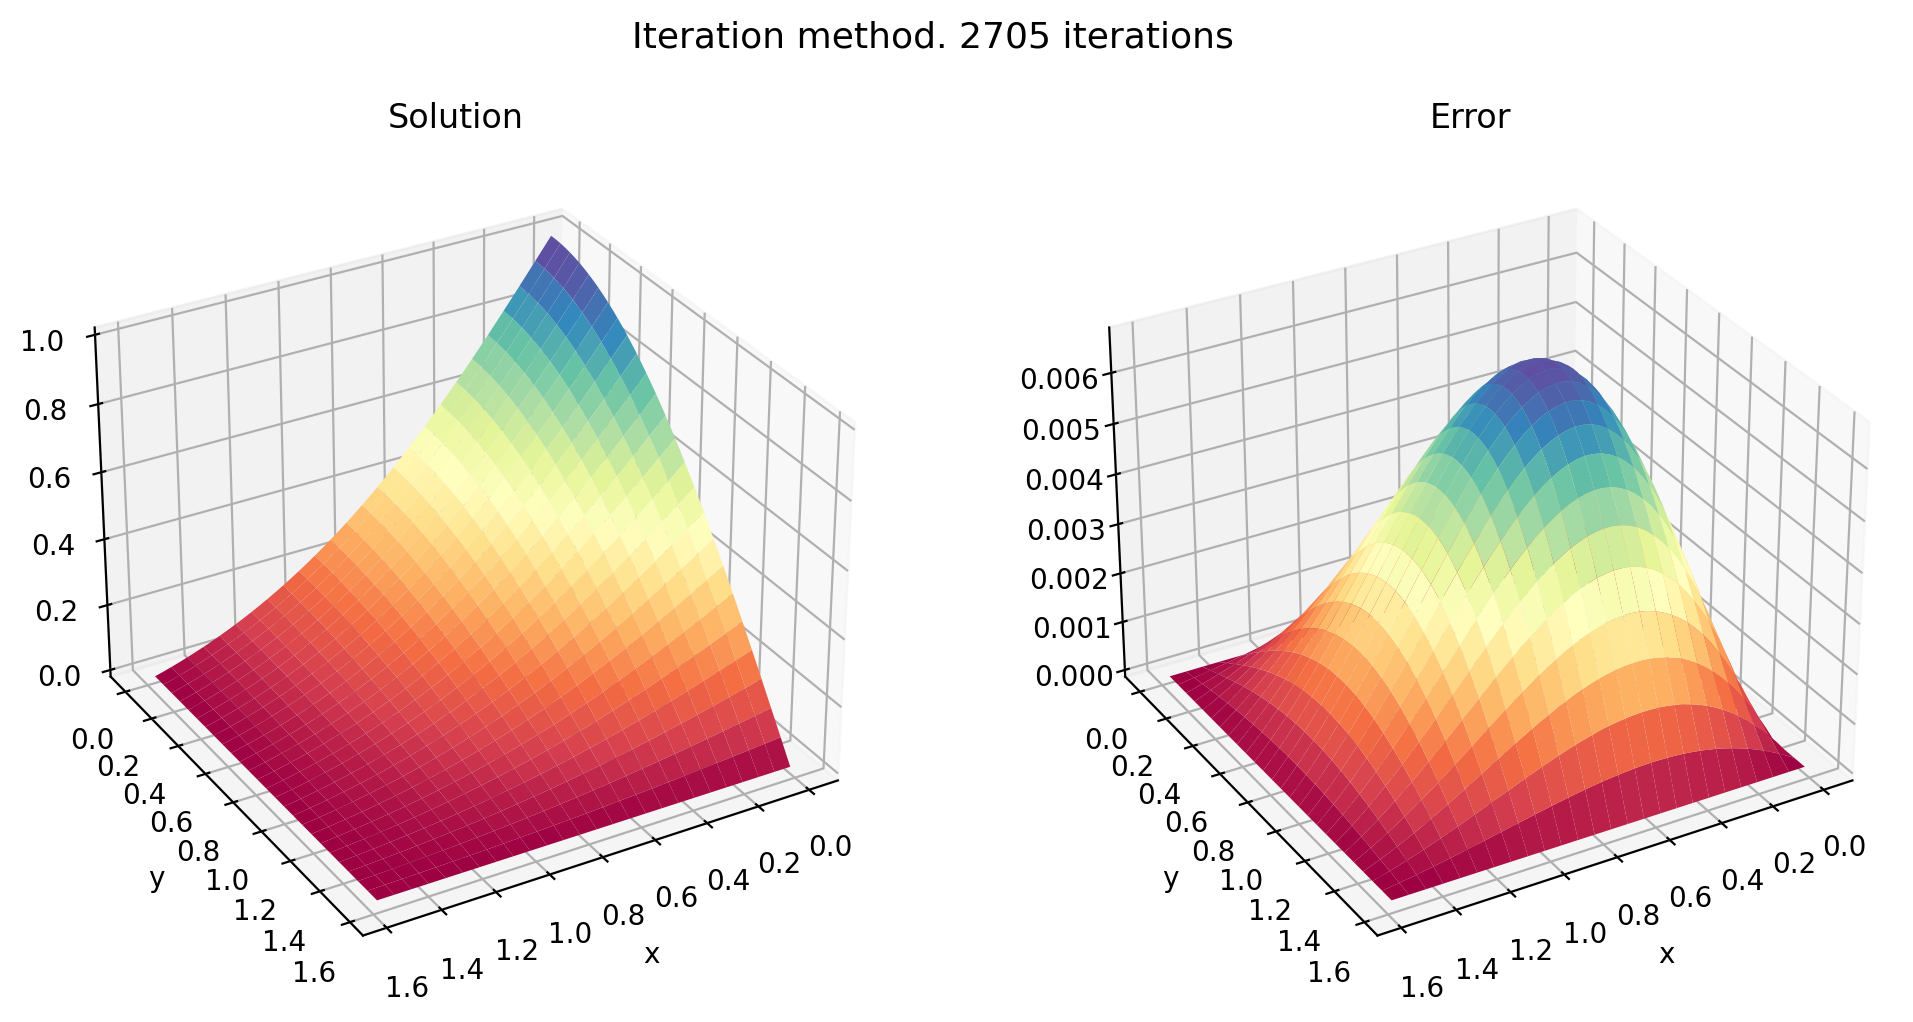

In [9]:
iter_count, x, y, u, error = solve(8, 'iteration', Nx, Ny, EPS)

plot_solution('iteration', iter_count, x, y, u, error, azim=60)

In [ ]:
plot_solution('iteration', iter_count, x, y, u, error, interactive=True)

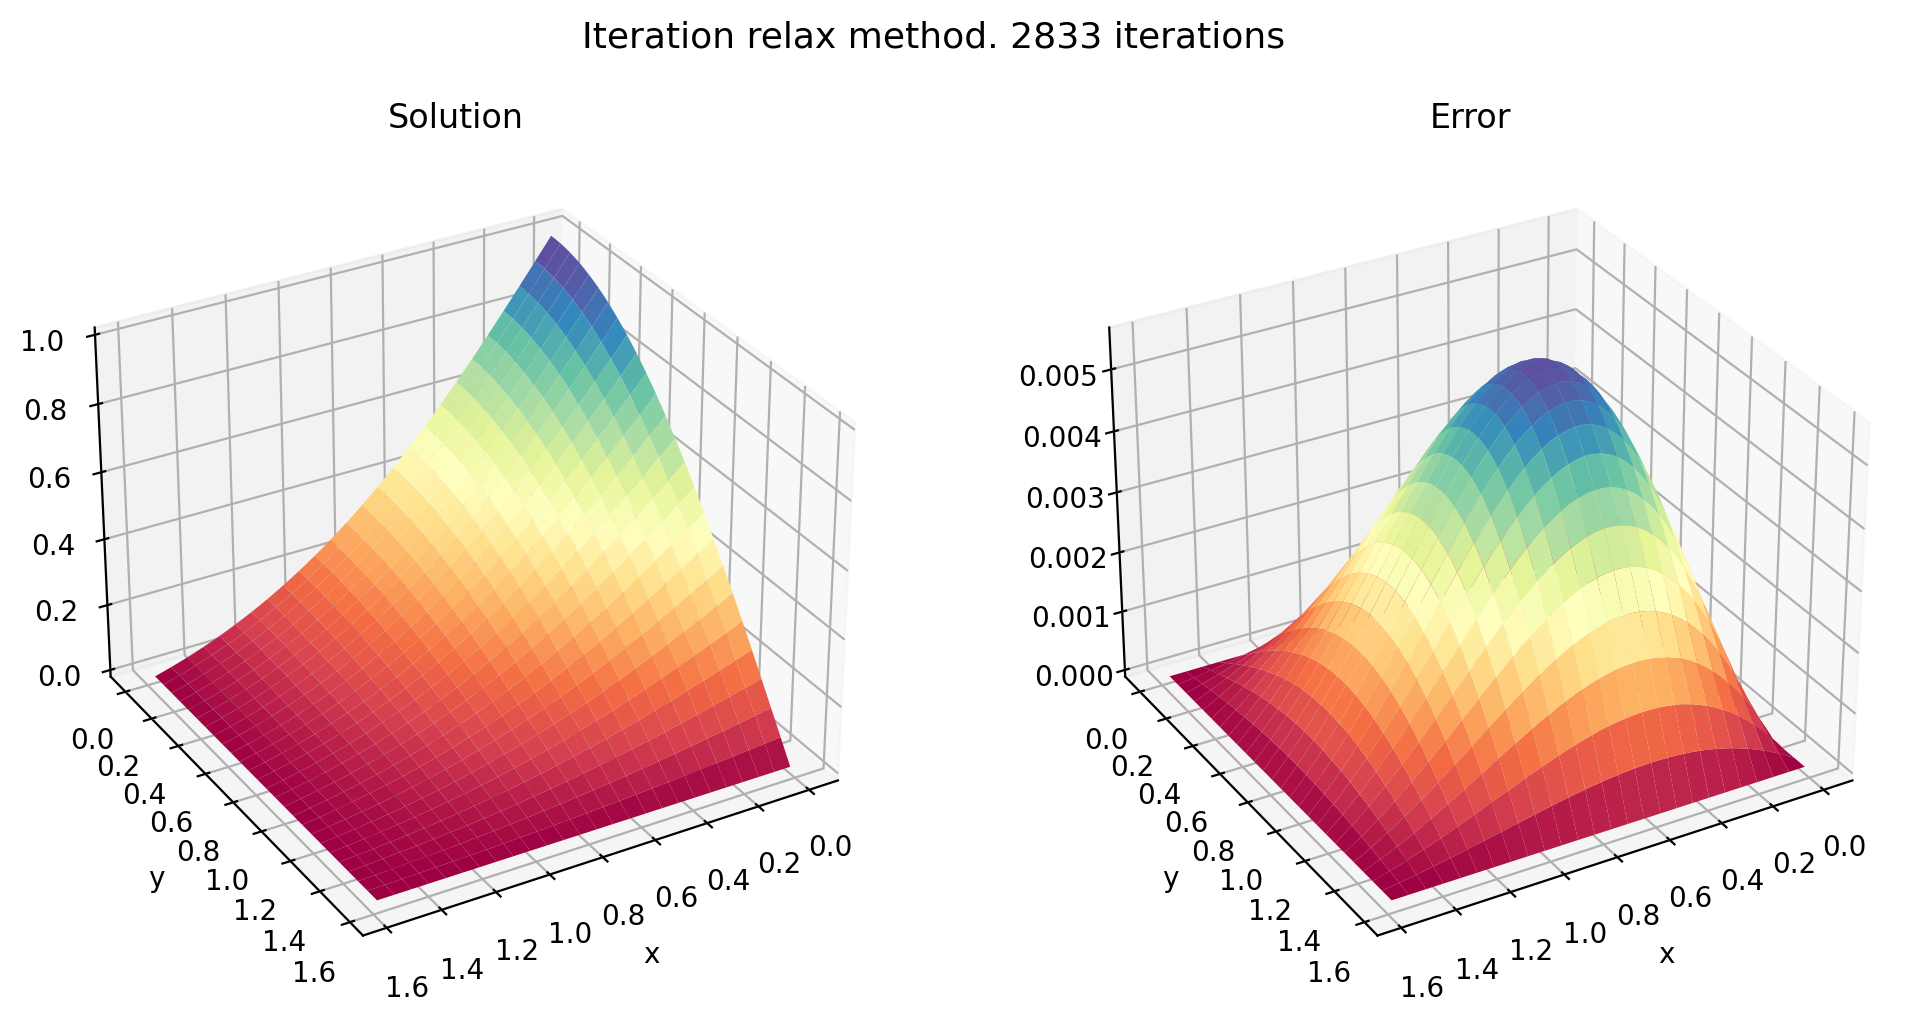

In [14]:
iter_count, x, y, u, error = solve(8, 'iteration', Nx, Ny, EPS, 1.001)

plot_solution('iteration relax', iter_count, x, y, u, error, azim=60)

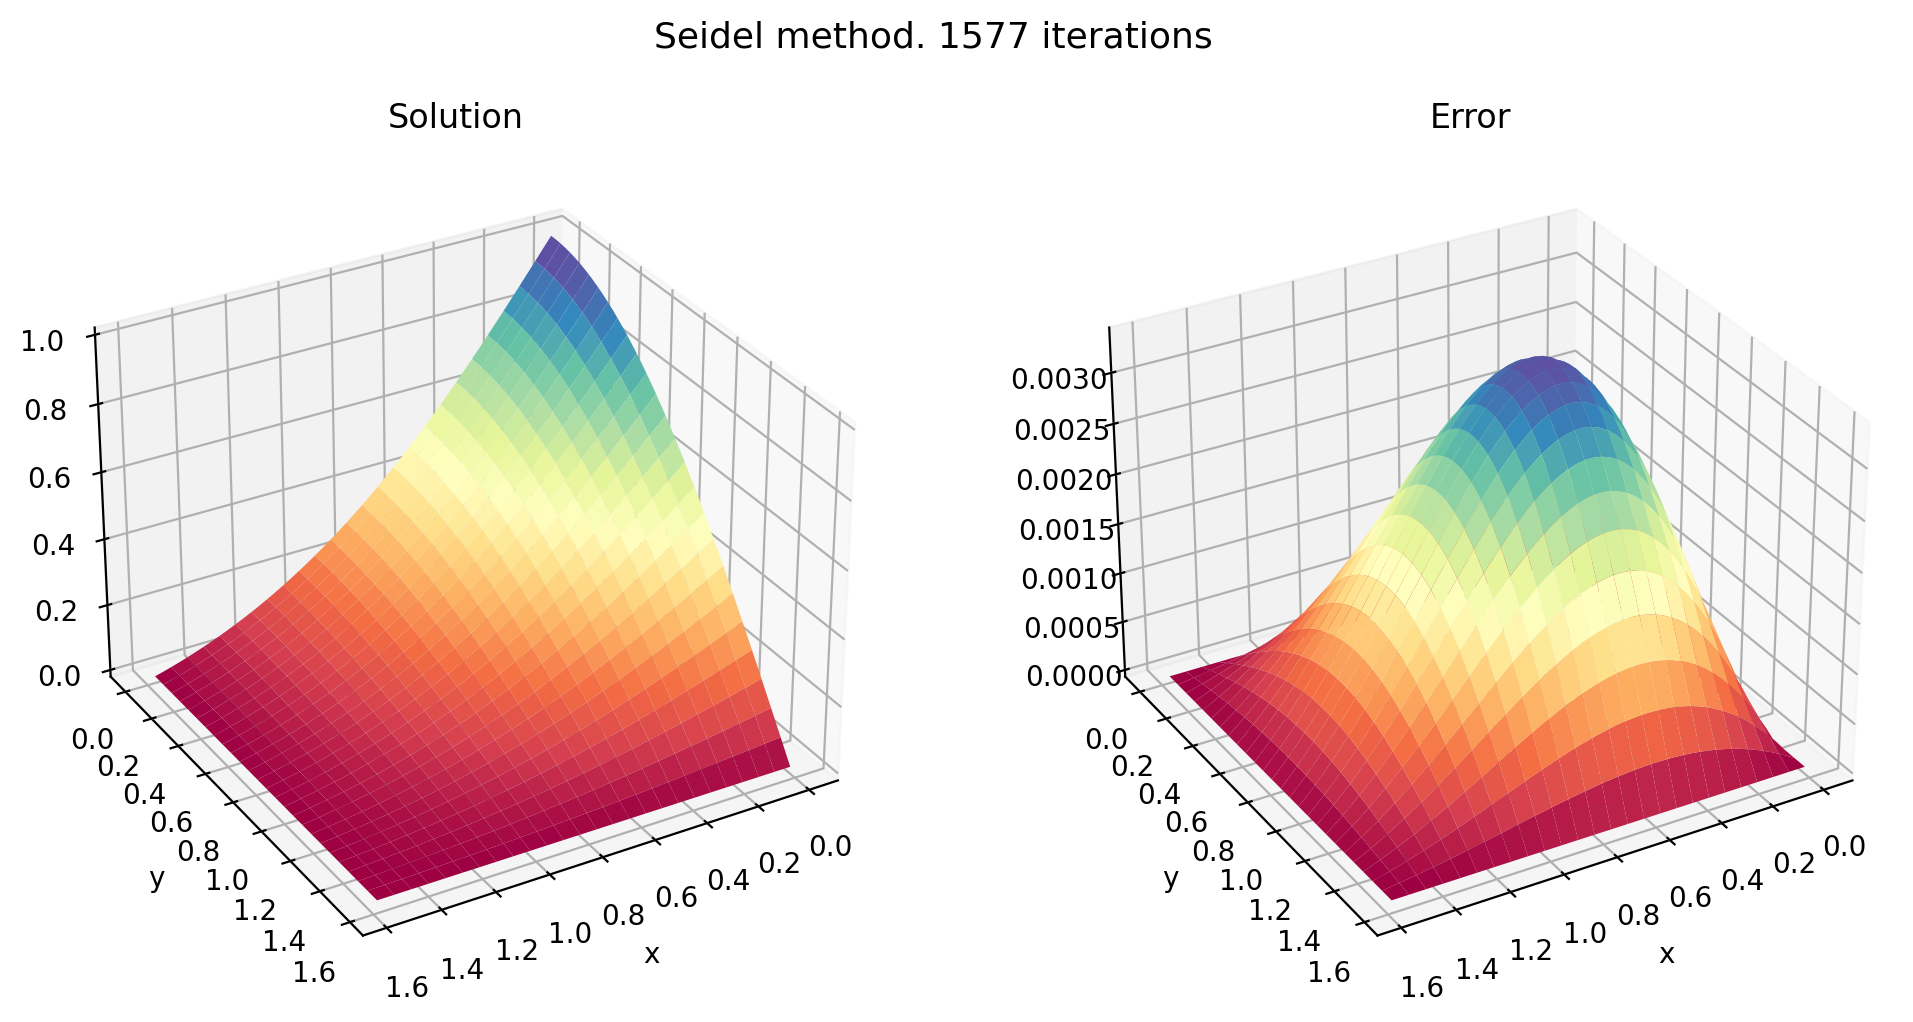

In [12]:
iter_count, x, y, u, error = solve(8, 'seidel', Nx, Ny, EPS)

plot_solution('seidel', iter_count, x, y, u, error, azim=60)

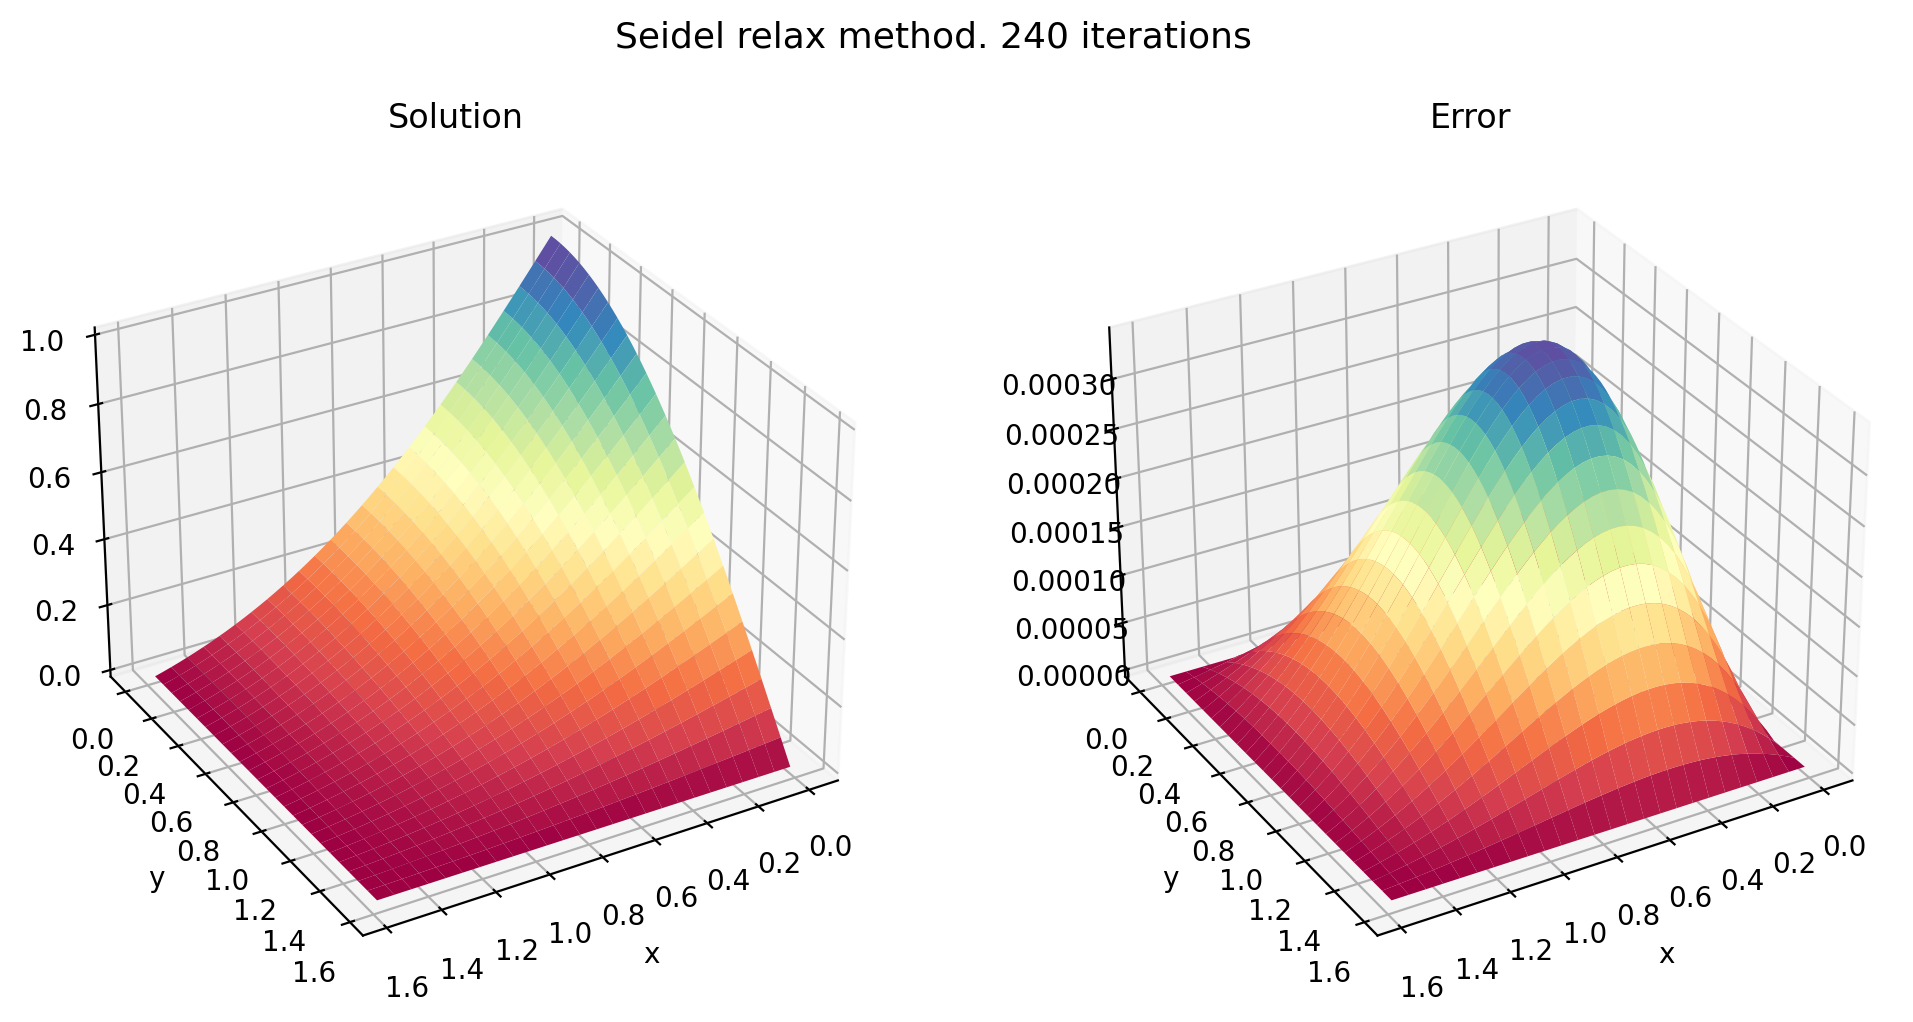

In [13]:
iter_count, x, y, u, error = solve(8, 'seidel', Nx, Ny, EPS, RELAX)

plot_solution('seidel relax', iter_count, x, y, u, error, azim=60)

## Вариант 1

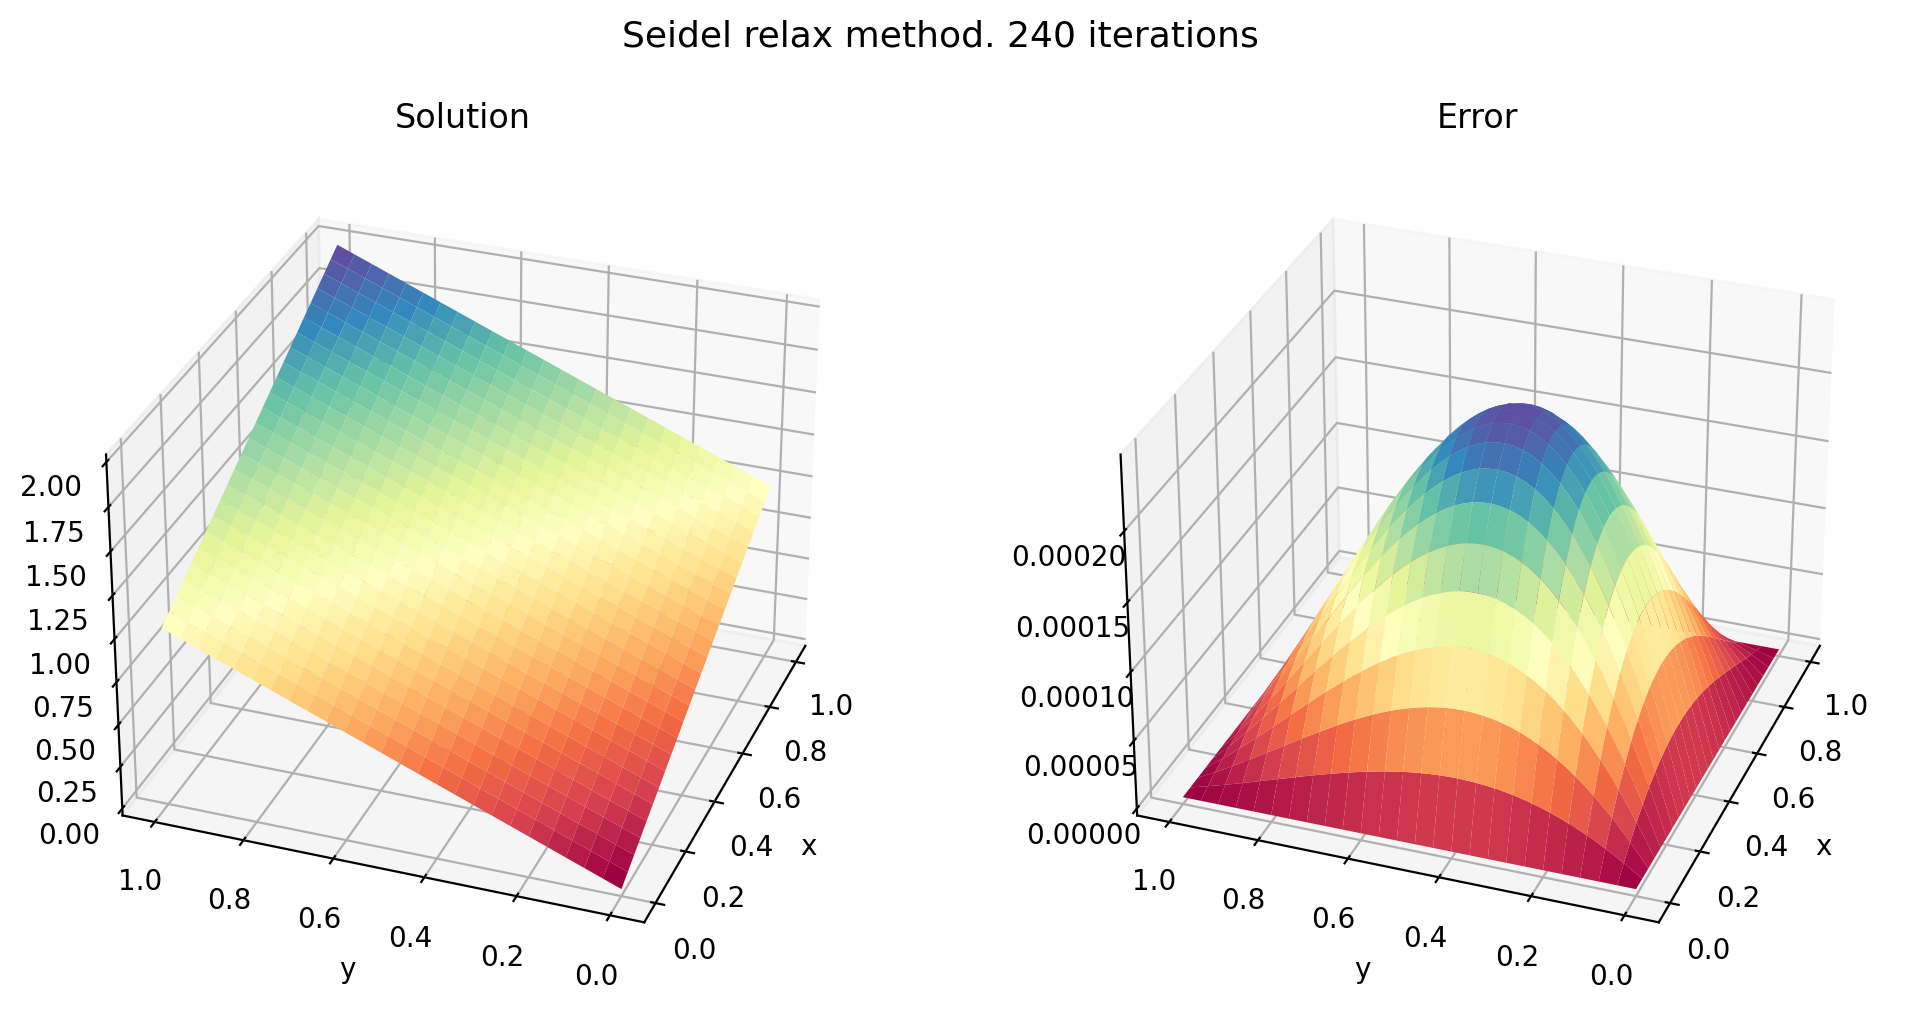

In [16]:
iter_count, x, y, u, error = solve(1, 'seidel', Nx, Ny, EPS, RELAX)

plot_solution('seidel relax', iter_count, x, y, u, error, azim=200)

## Вариант 4

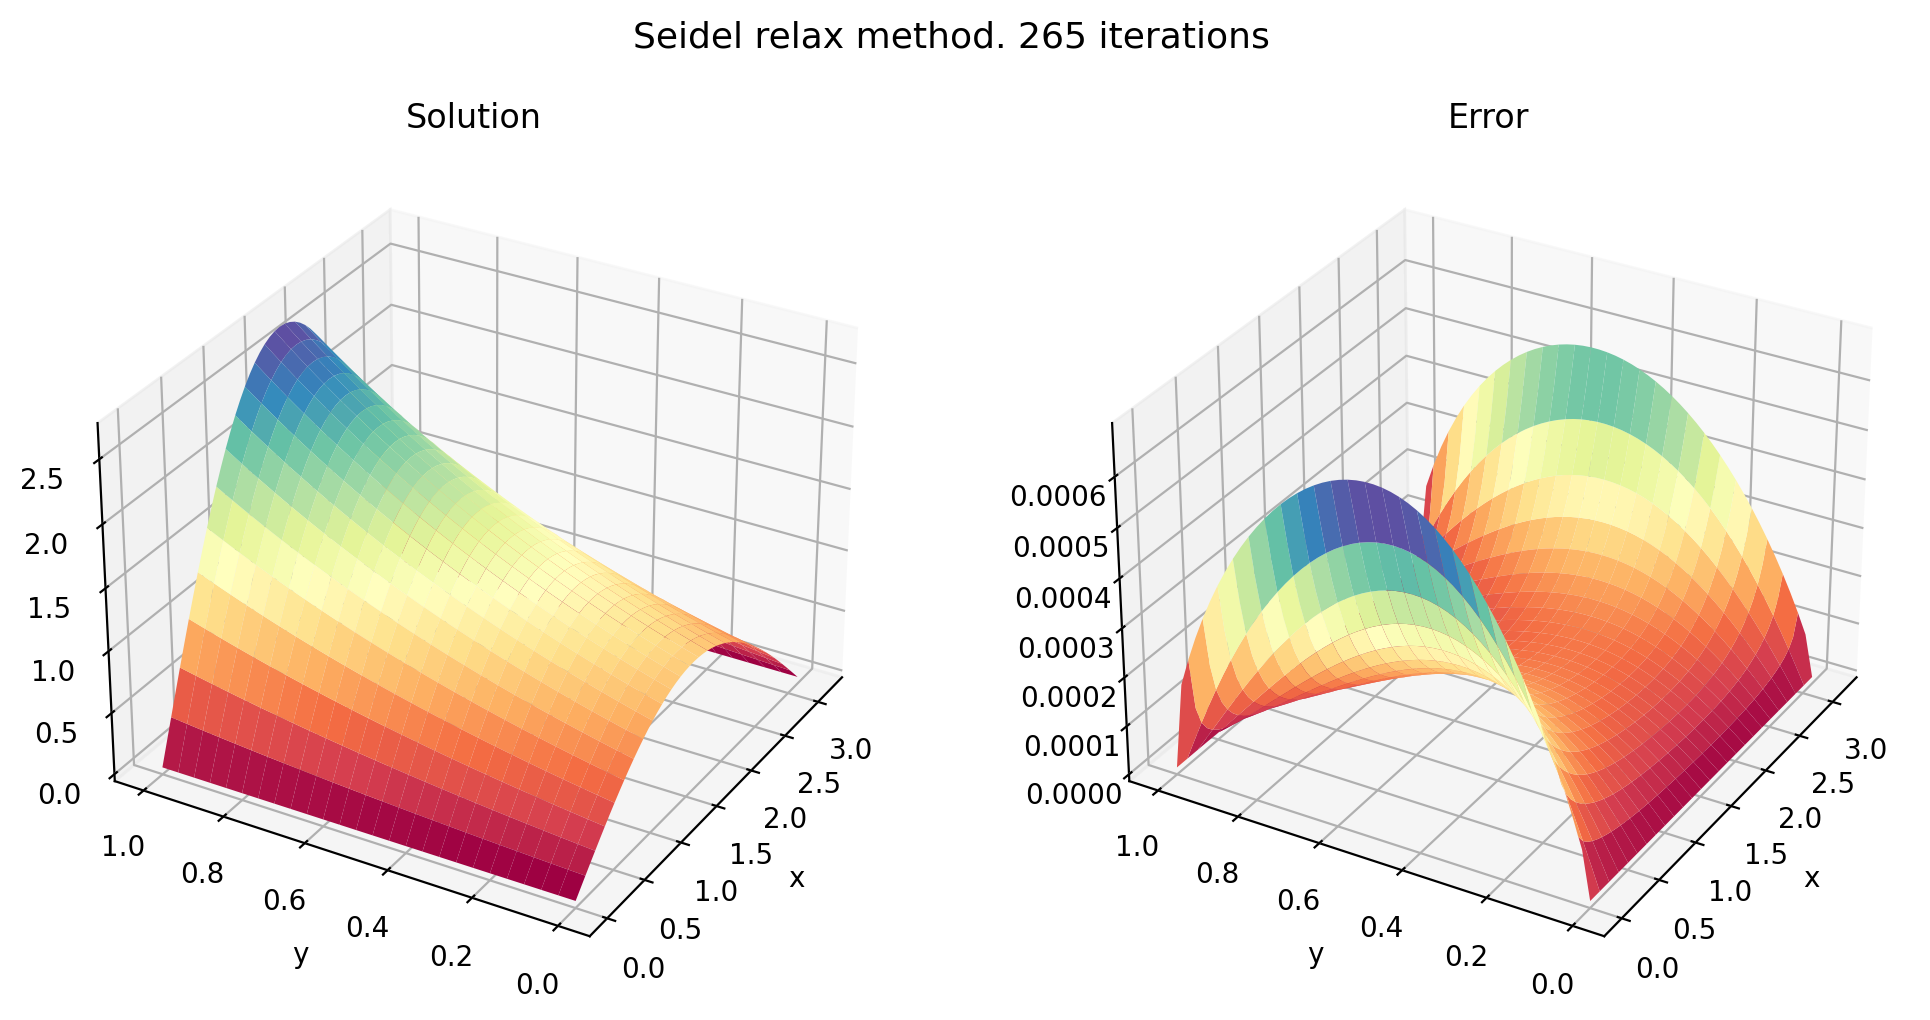

In [17]:
iter_count, x, y, u, error = solve(4, 'seidel', Nx, Ny, EPS, RELAX)

plot_solution('seidel relax', iter_count, x, y, u, error, azim=210)

## Вариант 3

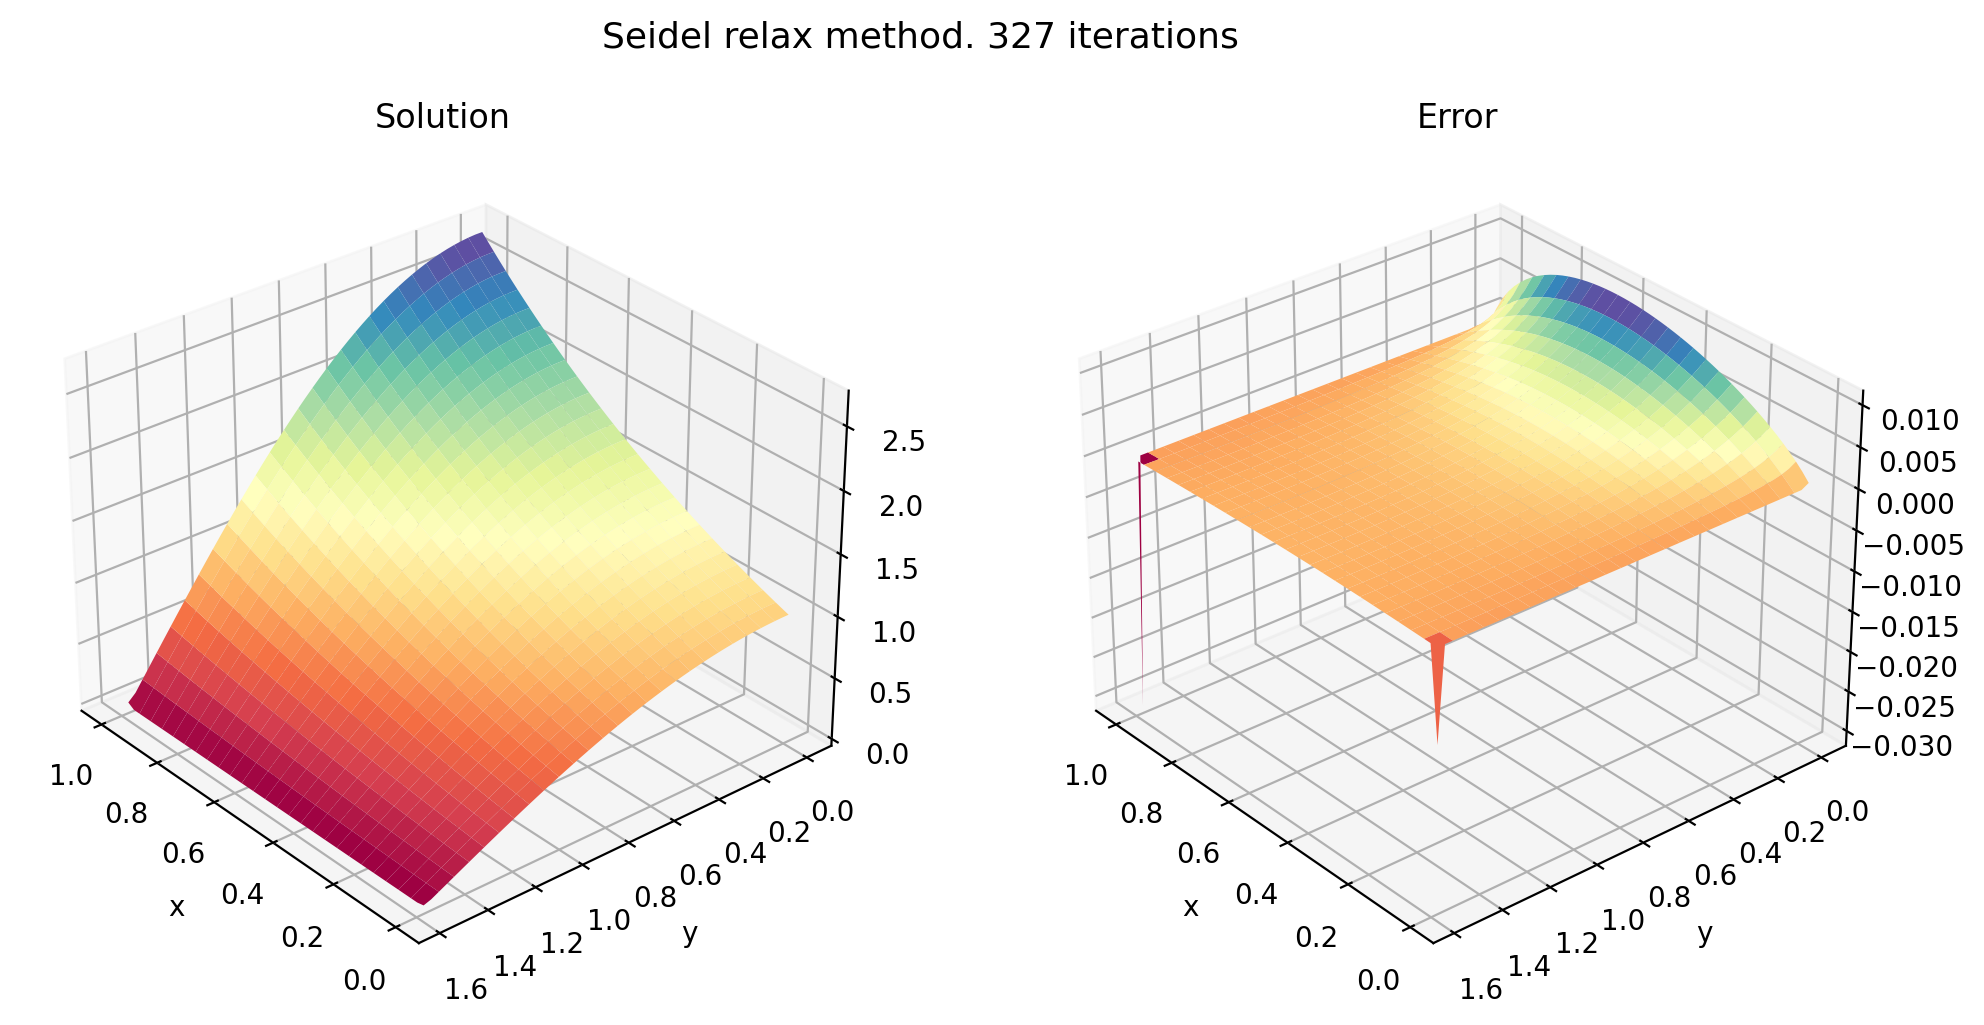

In [18]:
iter_count, x, y, u, error = solve(3, 'seidel', Nx, Ny, EPS, RELAX)

plot_solution('seidel relax', iter_count, x, y, u, error, azim=140)

## Вариант 2

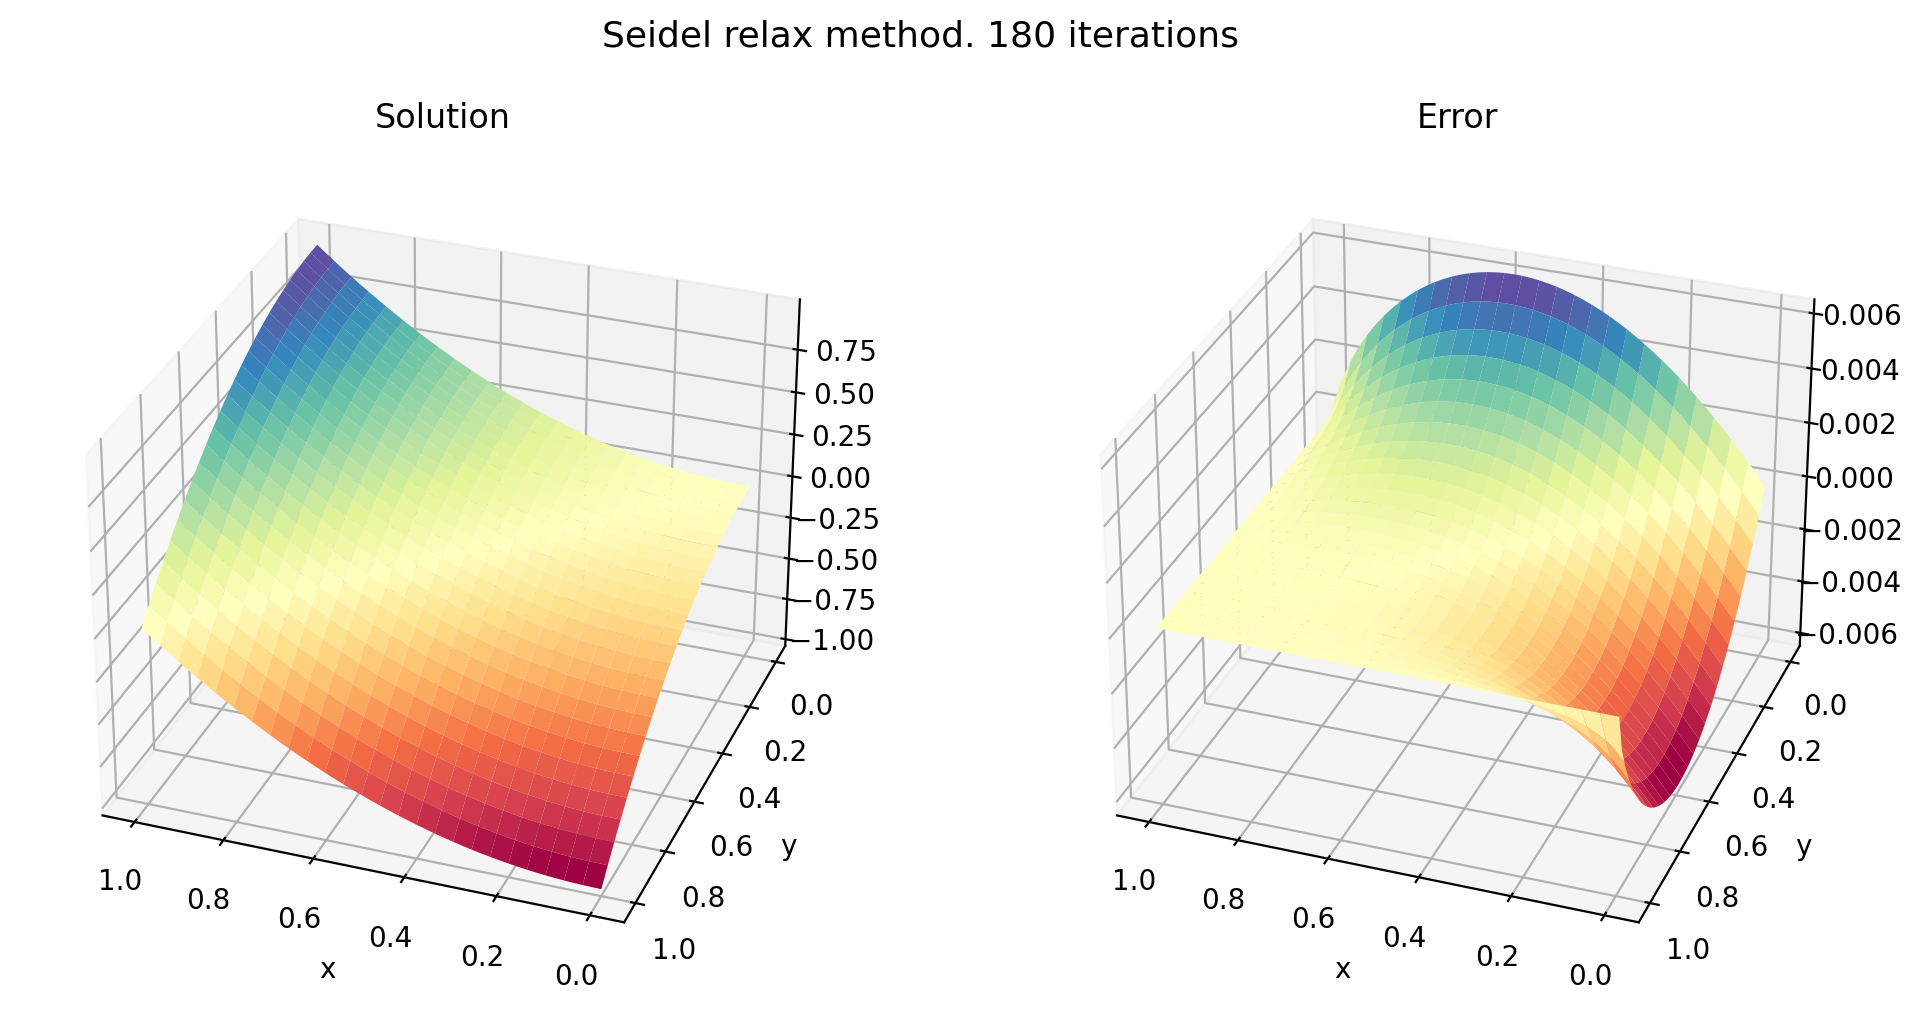

In [19]:
iter_count, x, y, u, error = solve(2, 'seidel', Nx, Ny, EPS, RELAX)

plot_solution('seidel relax', iter_count, x, y, u, error, azim=110)

## Вариант 5

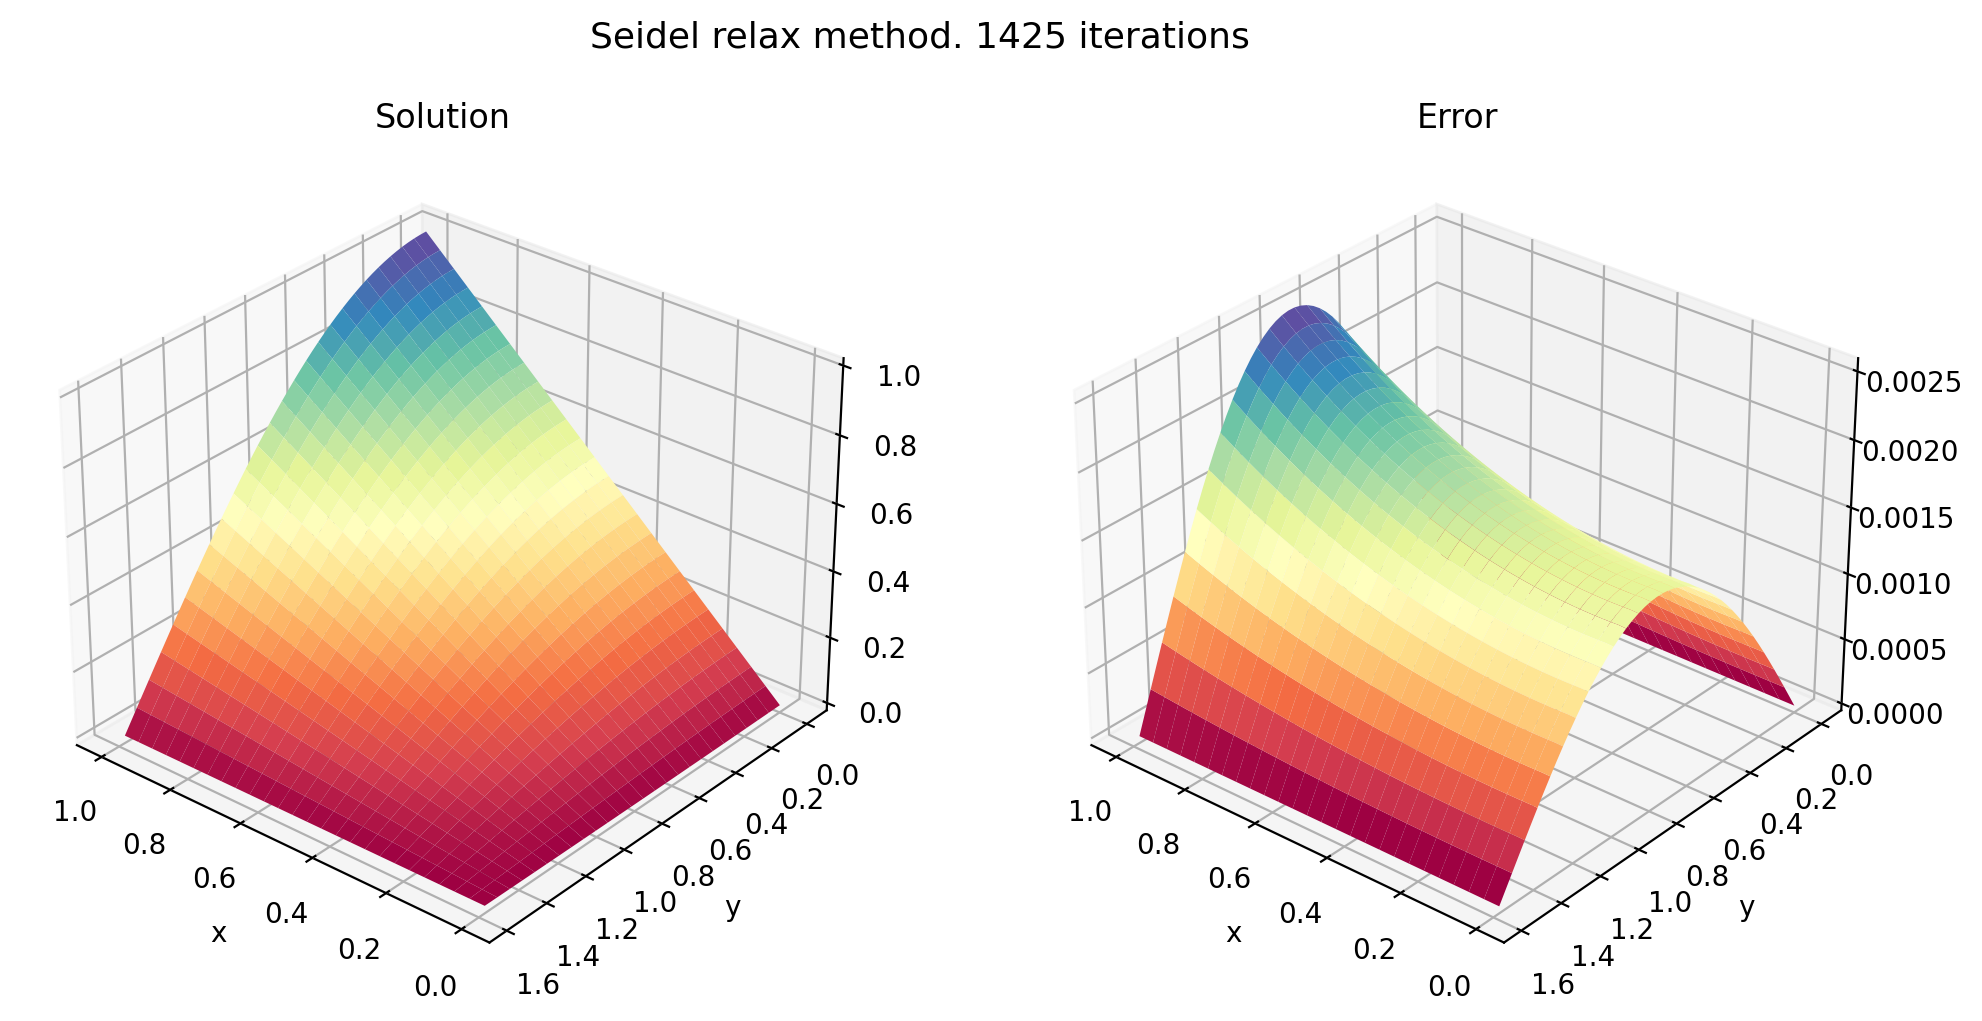

In [20]:
iter_count, x, y, u, error = solve(5, 'seidel', Nx, Ny, EPS, RELAX)

plot_solution('seidel relax', iter_count, x, y, u, error, azim=130)